In [2]:
import pandas as pd
import matplotlib.pylab as plt

years = [2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
all_years = []
for x in range(6):
    all_years.append(years)
flat_list = []
for sublist in all_years:
    for item in sublist:
        flat_list.append(item)       
projections = pd.read_csv('all_projected_results.csv')
projections.insert(0, 'Year', flat_list)
projections = projections.rename(columns={'Predicted Value': 'Projected Yield (Bushels/Acre)'})
projections

,Year,Model,Projected Yield (Bushels/Acre),Average Annual Percent Change
0,2020,Simple,50.772260,1.029169
1,2021,Simple,51.498637,1.029169
2,2022,Simple,52.010973,1.029169
3,2023,Simple,52.563703,1.029169
4,2024,Simple,53.079780,1.029169
...,...,...,...,...
61,2026,ElasticNet 0.75,55.224019,1.356509
62,2027,ElasticNet 0.75,55.860965,1.356509
63,2028,ElasticNet 0.75,56.497979,1.356509
64,2029,ElasticNet 0.75,57.385154,1.356509


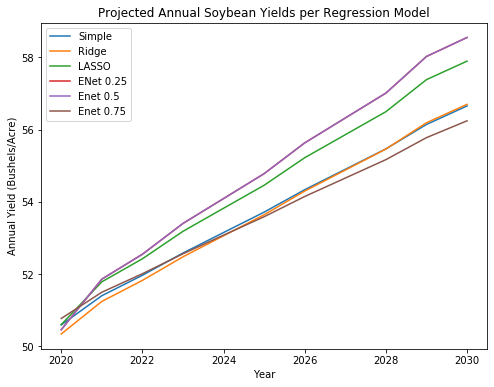

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
projections.groupby('Model').plot(kind='line',x='Year',y = "Projected Yield (Bushels/Acre)", ax=ax)
plt.legend(['Simple', 'Ridge', 'LASSO', 'ENet 0.25', 'Enet 0.5', 'Enet 0.75'])
plt.title('Projected Annual Soybean Yields per Regression Model')
plt.ylabel('Annual Yield (Bushels/Acre)')
plt.savefig('phase2projections.png')
plt.show()

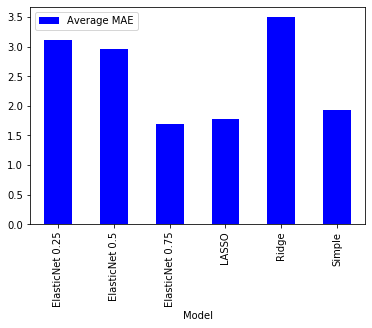

In [4]:
errors = pd.read_csv('all_results_accuracy.csv')
avg_errors = errors.groupby('Model').first()
avg_errors.reset_index(level=0, inplace=True)
avg_errors.plot(kind='bar', x = 'Model', y = 'Average MAE', color = 'blue')

In [94]:
projections_new = projections.sort_values(['Year', 'Model'])
projections_new.to_csv('projections_new.csv', index=False)